# Removiendo Multicolinealidad


In [ ]:
import pandas as pd


In [6]:
# Leer dataset de la presion de la sangere
datos=pd.read_csv("C:/Users/ARELYS/Downloads/bloodpress.txt", sep="\t")
datos.head()

,BP,Age,Weight,BSA,Dur,Pulse,Stress
0,105,47,85.4,1.75,5.1,63,33
1,115,49,94.2,2.10,3.8,70,14
2,116,49,95.3,1.98,8.2,72,10
3,117,50,94.7,2.01,5.8,73,99
4,112,51,89.4,1.89,7.0,72,95


In [8]:
# Verifica la multicolinealidad en el dataset usando la matriz de correlacion
# importamos seaborn y matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

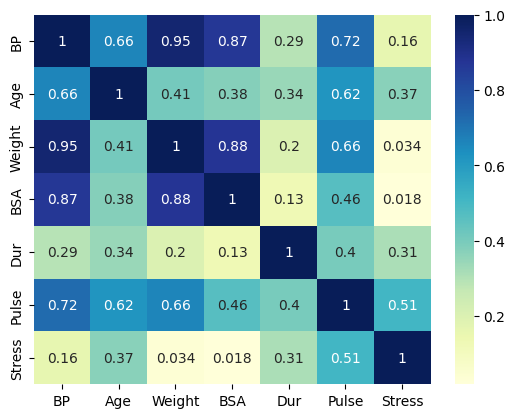

In [12]:
# Matriz de correlación
corr=datos.corr()
#Se traza mapa de color de la matriz de correlacion
sns.heatmap(corr, annot=True, cmap="YlGnBu") #con heatmap
plt.show() #Muestra

# Variables Dummy

In [ ]:
# Creamos el dataframe
datos=pd.DataFrame({'Genero':['F','M','M','F','M']})
datos.head()

,Genero
0,F
1,M
2,M
3,F
4,M


In [ ]:
# Codificacion de variables Dummy
datos_codificados=pd.get_dummies(datos['Genero'])
datos_codificados.head() # Con head se despliega

,F,M
0,True,False
1,False,True
2,False,True
3,True,False
4,False,True


In [16]:
# Elimina una columna
datos_codificados_eliminados =pd.get_dummies(datos['Genero'], drop_first=True)
datos_codificados_eliminados.head()

,M
0,False
1,True
2,True
3,False
4,True


# Desarrollo de un modelo de regresion lineal

In [ ]:
# Prediccion de las ventas por ingresos en TV, Radio y Periodico
#Lee dataset
# Leer dataset de la presion de la sangere
df=pd.read_csv("C:/Users/ARELYS/Downloads/Advertising.csv")
df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [21]:
# Define conjunto de variables independientes
X= df[['TV','Radio','Newspaper']]
# Variable dependiente
Y = df.Sales

In [23]:
#Importa metodo de entrenamiento train_test_split en la libreira sklearn.model_selection
from sklearn.model_selection import train_test_split



In [26]:
#Distribuye independinete ,  dependiente en dos partes entrenamiento y test
x_train,x_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=0)


In [28]:
#Importa modelo de regresion Lineal
from sklearn.linear_model import LinearRegression
#Crea modelo de regresion Lineal
lin_reg= LinearRegression()

In [29]:
# Entrena el modelo de regresion lineal
lin_reg.fit(x_train,y_train)

LinearRegression()

In [32]:
# Predice valores de validación
predicciones = lin_reg.predict(x_test)

In [34]:
#sales= Intercepto= a1*TV + a2*Radio +a3*NewsPaper
# imprime el intercepto (termino independiente) y coeficientes
print("Intercepto:",lin_reg.intercept_)
print("Coeficientes:",lin_reg.coef_)

Intercepto: 2.89257005115115
Coeficientes: [0.04416235 0.19900368 0.00116268]


In [ ]:
#sales= 2.89257005115115= 0.04416235*TV + 0.19900368*Radio + 0.00116268*NewsPaper
# kaggle dataset